In [1]:
#import libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
# read csv
train = pd.read_csv('data/train_test/train.csv', header = 0)
test = pd.read_csv('data/train_test/test.csv', header = 0)

In [3]:
# split X and y
y_train = train['M']
X_train = train.drop(columns = ['M'])

y_test = test['M']
X_test = test.drop(columns = ['M'])

In [4]:
# data normalization
from sklearn.preprocessing import StandardScaler

# list for cols to scale
cols_to_scale = ['Fe','S1','S2','S3','S4','Ni','Co','Cr','Mn','Se','S','Te']

#create and fit scaler using train data
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

#scale trained data
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

# scale test data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# Machine Learning Models

## Import libraries

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [6]:
# define 10-Fold CV object
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

## 1. Linear Regression

In [7]:
# create lr model
lr = LinearRegression()

# calculate cross validation scores
# MSE
score = cross_val_score(lr, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())
print("---------------------")

# R2 Error
score = cross_val_score(lr, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())
print("---------------------")

# MAE
score = cross_val_score(lr, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-6.62049115 -7.32942984 -6.47729331 -7.23570509 -7.03503016 -7.42770107
 -6.75655087 -7.83059039 -6.24506202 -7.06546415] 

Negative Mean Square Error: -7.002331806566119
---------------------
Scores:  [0.69703931 0.66940064 0.66956488 0.71029315 0.68987915 0.67448625
 0.71657408 0.69660077 0.72457546 0.69525168] 

R2 Mean Score: 0.6943665363180347
---------------------
Scores:  [-2.09066843 -2.19953295 -2.09042594 -2.20123383 -2.1305333  -2.26679365
 -2.15809787 -2.26123849 -2.06059702 -2.21403773] 

Mean Absolute Error: -2.1673159207975177


## 2. SVR

In [8]:
from sklearn.svm import SVR
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
parameters = {'kernel': ('rbf','poly'), 'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50,100],'gamma': [1,0.1,0.01,0.001,0.0001,0.00001]}
svr = SVR()
reg = GridSearchCV(svr, parameters, verbose=2)
reg.fit(X_train,y_train)
reg.best_params_

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


In [9]:
# r2_score SVR
for C in [12]:
    summ = 0
    print("C = "+str(C))
    for train, val in kfold.split(X_train):
        X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
        X_val, y_val = X_train.iloc[val], y_train.iloc[val]

        svr = SVR(C=12)
        svr.fit(X_train_small,y_train_small)

        y_pred = svr.predict(X_val)
        # res = mean_squared_error(y_pred, y_val)
        
        res = r2_score(y_pred, y_val)
        summ = summ + res
        print(res)
    print("Average = "+str(summ/10))
    print("-----------------------")

C = 12
0.929812946093169
0.9325899047061833
0.914287718723866
0.9322598210763435
0.9332810553004589
0.9197125797219148
0.9241234811272864
0.9271868200297224
0.9198028821157143
0.9222827299891154
Average = 0.9255339938883773
-----------------------


In [10]:
#mean absolute error SVR
for C in [12]:
    summ = 0
    print("C = "+str(C))
    for train, val in kfold.split(X_train):
        X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
        X_val, y_val = X_train.iloc[val], y_train.iloc[val]

        svr = SVR(C=C)
        svr.fit(X_train_small,y_train_small)

        y_pred = svr.predict(X_val)
        # res = mean_squared_error(y_pred, y_val)
        
        res = mean_absolute_error(y_pred, y_val)
        summ = summ + res
        print(res)
    print("Average = "+str(summ/10))
    print("-----------------------")

C = 12
0.583053816048711
0.5904888753856085
0.5723921562712055
0.608027160803529
0.5324099872966578
0.5892896783246114
0.554104512424551
0.5928540437916852
0.5130706872480152
0.6062349878498415
Average = 0.5741925905444416
-----------------------


## 3. Decision Tree

In [11]:
dt = DecisionTreeRegressor()

# MSE
score = cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(dt, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())
print("---------------------")


# MAE
score = cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-1.72058446 -1.72237218 -1.77819267 -1.86422235 -1.81037493 -1.11439629
 -1.22354608 -1.88503437 -1.4067101  -2.18679418] 

Negative Mean Square Error: -1.6712227599730596
---------------------
Scores:  [0.92134751 0.92171383 0.91110731 0.93177209 0.922262   0.95505482
 0.94899879 0.92896712 0.93718971 0.9058802 ] 

R2 Mean Score: 0.92842933644417
---------------------
Scores:  [-0.56265445 -0.52033796 -0.55881602 -0.53338759 -0.57890467 -0.49616773
 -0.4649394  -0.62476902 -0.52992519 -0.61955251] 

Mean Absolute Error: -0.5489454539292222


## 4. Random Forest

### Grid Search

In [12]:
import numpy as np

from sklearn import ensemble

# Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [20,50,100,200,300,400,500,600, 700,800,900, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,20]}

# reg = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
reg = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
reg.fit(X_train, y_train)
#print(reg.best_estimator_)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500, min_samples_split = 13)

# MSE
score = cross_val_score(rf_reg, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ", score,"\n\nNegative Mean Square Error:",score.mean())


print("---------------------")

# R2 Error
score = cross_val_score(rf_reg, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())

# MAE
print("---------------------")
score = cross_val_score(rf_reg, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())


Scores:  [-1.44137979 -1.55470469 -1.24497257 -1.51900609 -1.50560078 -1.1926084
 -1.17261787 -1.809275   -1.28921469 -1.63515467] 

Negative Mean Square Error: -1.4364534531856132
---------------------
Scores:  [0.93399495 0.9300816  0.93611262 0.93914451 0.93358843 0.94768831
 0.95026586 0.93037603 0.94364026 0.92917286] 

R2 Mean Score: 0.9374065443525794
---------------------
Scores:  [-0.55160816 -0.54255994 -0.52570619 -0.55584898 -0.57789195 -0.54035153
 -0.49956881 -0.6272368  -0.53718422 -0.58186608] 

Mean Absolute Error: -0.5539822667195661


## 5. KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

# MSE
score = cross_val_score(knn, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(knn, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())

# MAE
print("---------------------")
score = cross_val_score(knn, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-1.57284425 -2.07397086 -1.64270622 -2.0523524  -2.11677536 -1.40599941
 -1.30825049 -1.83604152 -1.45116284 -1.94825641] 

Negative Mean Square Error: -1.740835976548275
---------------------
Scores:  [0.92802498 0.90645201 0.91619836 0.91782687 0.90668751 0.93838307
 0.9451211  0.92886187 0.9359997  0.9159676 ] 

R2 Mean Score: 0.9239523059691424
---------------------
Scores:  [-0.61521189 -0.65325514 -0.62359297 -0.64534108 -0.68876757 -0.5984206
 -0.5579729  -0.70775447 -0.60454851 -0.63049919] 

Mean Absolute Error: -0.6325364312605288


### XGBoost

In [15]:
from sklearn import ensemble

reg = ensemble.GradientBoostingRegressor()

# MSE
score = cross_val_score(reg, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(reg, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())


# MAE
print("---------------------")
score = cross_val_score(reg, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())



Scores:  [-1.51229102 -1.82667785 -1.23848509 -1.55040293 -1.54734647 -1.47612781
 -1.27373632 -1.80597346 -1.80597028 -1.77264267] 

Negative Mean Square Error: -1.580965389935382
---------------------
Scores:  [0.93079596 0.91760634 0.93681945 0.93792418 0.93178929 0.93530974
 0.94657129 0.93002686 0.92035171 0.92356941] 

R2 Mean Score: 0.9310764240447537
---------------------
Scores:  [-0.6724323  -0.6963745  -0.63253687 -0.67211028 -0.69701847 -0.67943528
 -0.63676067 -0.7305399  -0.76143233 -0.70871043] 

Mean Absolute Error: -0.6887351040981338


# Deep Learning Models

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [20]:
sum_mse, sum_r2, sum_mae = 0, 0, 0
for train, val in kfold.split(X_train):
    X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
    X_val, y_val = X_train.iloc[val], y_train.iloc[val]

    # define model
    model = Sequential()
    model.add(Dense(254, activation= 'relu', input_shape = (12,))) #input shape = X_train[0].shape
    model.add(Dense(64, activation= 'relu'))
    # model.add(Dense(4, activation= 'relu'))
    model.add(Dense(1))

    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01), loss='mse')

    #early stopping
    callback = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', mode = 'min')

    history = model.fit(X_train_small,y_train_small, epochs = 500,  batch_size=256, verbose=1, validation_data = (X_val,y_val), callbacks = [callback])
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    r2 = r2_score(y_pred, y_val)
    mae = mean_absolute_error(y_pred, y_val)
    sum_mse = sum_mse + mse
    sum_r2 = sum_r2 + r2
    sum_mae = sum_mae + mae
    print(str(mse), str(r2), str(mae))
    
print("-----------------------")  
print("Average = ", str(sum_mse/10), str(sum_r2/10), str(sum_mae/10))
print("-----------------------")

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 8.8421 - val_loss: 2.3529
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1406 - val_loss: 2.1760
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 1.9351 - val_loss: 1.8428
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7964 - val_loss: 1.8418
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7745 - val_loss: 1.9075
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6887 - val_loss: 1.8922
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7341 - val_loss: 1.7550
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6443 - val_loss: 1.7157
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6093 - val_loss: 1.6829
Epoch 10/500
13/13 [==============================] - 0s 7ms/step - loss: 1.6021 - val_loss: 2.0114
Epoch 11

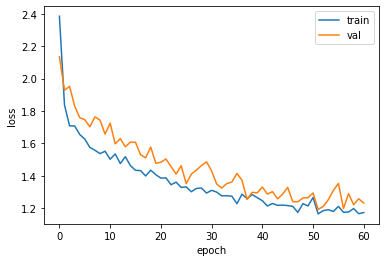

In [14]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [67]:
model.save('ann.h5')